In [1]:
from DataManager import CALFData, collateGCN
import numpy as np
import torch 
from Model import ContextAwareModel
from helpers.loss import ContextAwareLoss, SpottingLoss
from train import trainer
import pickle
from dataclasses import dataclass
import matplotlib.pyplot as plt
from Visualiser import collateVisGCN, Visualiser

In [2]:
@dataclass
class Args:
    receptive_field = 20
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 15
    chunk_size = 60
    batch_size = 32
    input_channel = 10
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=180
    load_weights=None
    model_name="Testing_Model"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=1.5
    loss_weight_detection=1.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 4

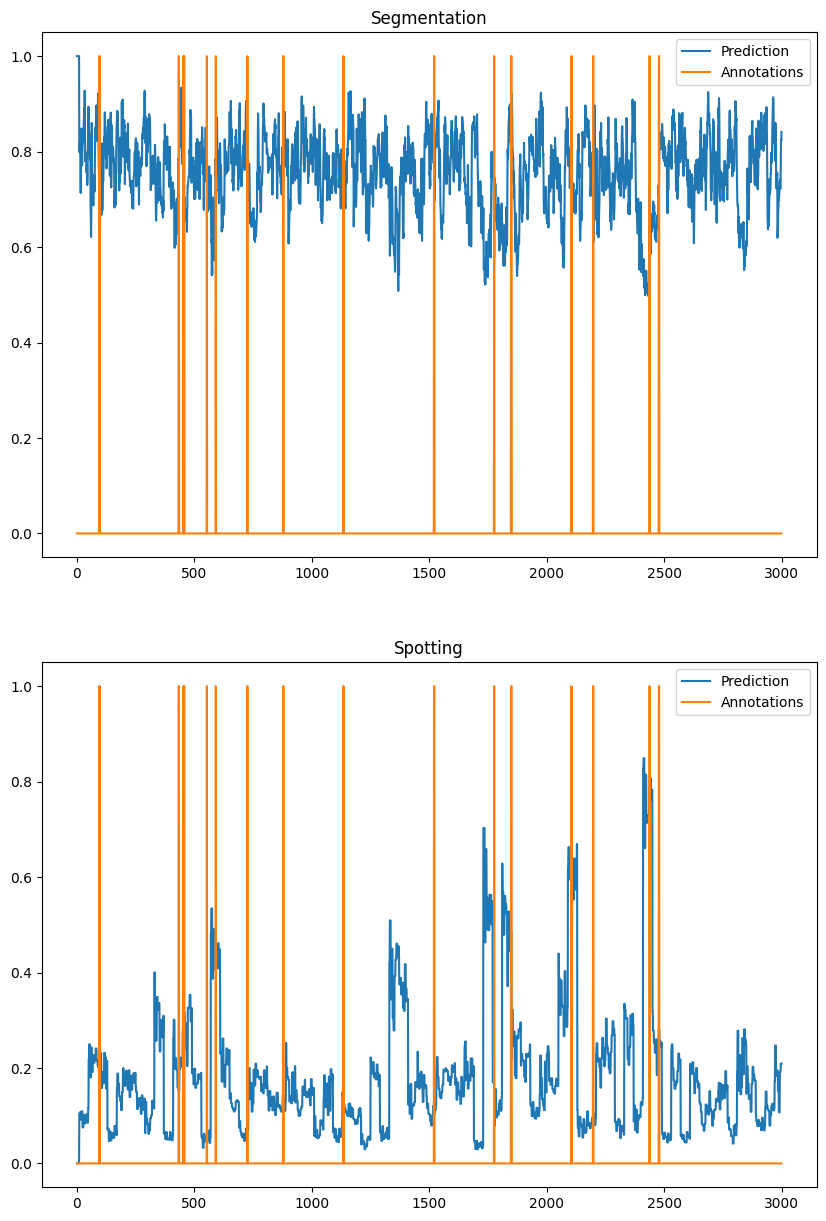

In [4]:
# args = Args
# collate_fn = collateVisGCN
# model_path = "models/detector9_1.pth.tar"
# model = torch.load(model_path)
# visualiser = Visualiser(collate_fn, args, model, smoothing=True, val=False)
visualiser.plot_predictions(frame_threshold=15000, save_dir="plots/PredictionsPlot.png", annotation='Shot')
# visualiser.visualize(frame_threshold=5000, save_dir="animations/PredictionsAnnotated.mp4", interval=60)
# mAP = visualiser.calculate_MAP()

In [4]:
args = Args
collate_fn = collateGCN

train_dataset = CALFData(split="train", args=args)

train_loader = torch.utils.data.DataLoader(train_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)


Get labels & features: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


In [6]:
labels, targets, representations = next(iter(train_loader))

tensor([[[-1., -1., -1., -1.],
         [-1., -1., -1., -1.],
         [-1., -1., -1., -1.],
         ...,
         [-1., -1., -1., -1.],
         [-1., -1., -1., -1.],
         [-1., -1., -1., -1.]],

        [[-1., -1., -1., -1.],
         [-1., -1., -1., -1.],
         [-1., -1., -1., -1.],
         ...,
         [-1., -1., -1., -1.],
         [-1., -1., -1., -1.],
         [-1., -1., -1., -1.]],

        [[-1., -1., -1., -1.],
         [-1., -1., -1., -1.],
         [-1., -1., -1., -1.],
         ...,
         [-1., -1., -1., -1.],
         [-1., -1., -1., -1.],
         [-1., -1., -1., -1.]],

        ...,

        [[-1., -1., -1., -1.],
         [-1., -1., -1., -1.],
         [-1., -1., -1., -1.],
         ...,
         [-1., -1., -1., -1.],
         [-1., -1., -1., -1.],
         [-1., -1., -1., -1.]],

        [[-1., -1., -1., -1.],
         [-1., -1., -1., -1.],
         [-1., -1., -1., -1.],
         ...,
         [-1., -1., -1., -1.],
         [-1., -1., -1., -1.],
         

In [8]:
seg, spot = model(representations)

array([0.3604794 , 0.41763425, 0.3999845 , 0.38854122, 0.3877896 ,
       0.39435267, 0.38351125, 0.3701272 , 0.37536386, 0.37076426,
       0.3691405 , 0.38123572, 0.3764316 , 0.36546677, 0.37514135,
       0.37997127, 0.36985794, 0.38522717, 0.37103584, 0.36726648,
       0.34762055, 0.3489828 , 0.3384565 , 0.34125727, 0.34228677,
       0.3436627 , 0.34084257, 0.35966423, 0.3723851 , 0.38169074,
       0.36521408, 0.35470912, 0.35648736, 0.38327757, 0.38255668,
       0.3943387 , 0.39547276, 0.3984527 , 0.40536147, 0.42235747,
       0.44338974, 0.43042678, 0.41680732, 0.40599903, 0.4031601 ,
       0.40247425, 0.4021354 , 0.40758568, 0.4120858 , 0.42338693,
       0.4892161 , 0.49088687, 0.4847727 , 0.47994316, 0.47107252,
       0.4641699 , 0.4591198 , 0.4614755 , 0.4579257 , 0.46049464,
       0.45040533, 0.4556992 , 0.45201838, 0.4609463 , 0.47791886,
       0.49779463, 0.5167022 , 0.52101177, 0.5174813 , 0.51659864,
       0.5029781 , 0.49224913, 0.47105837, 0.4678982 , 0.46227

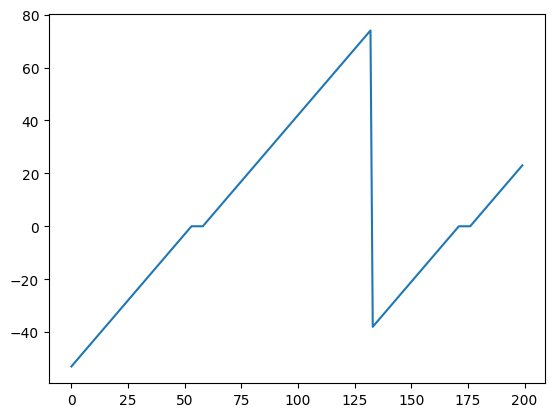

In [80]:
plt.plot(labels[10][50:250,0])


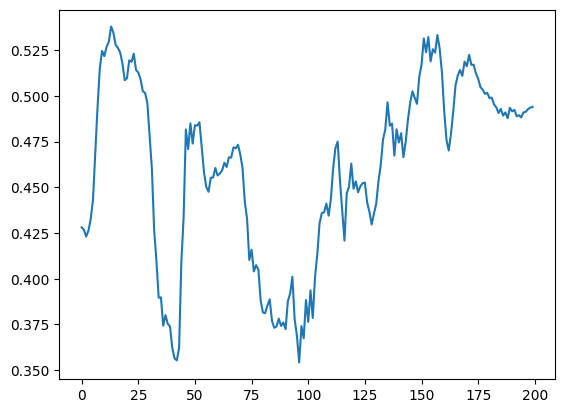

In [81]:
plt.plot(seg[10][50:250,0].detach().numpy())
plt.show()

In [8]:
collate_fn = collateGCN
validation_dataset = CALFData(split="validate", args=args)
validate_loader = torch.utils.data.DataLoader(validation_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

Get labels & features: 100%|██████████| 2/2 [00:08<00:00,  4.25s/it]


In [9]:
_,_,x = next(iter(validate_loader))

In [14]:
model_path = "models/detector4_1.pth.tar"
model = torch.load(model_path)
l, m = model(x)

In [17]:
for segmentation in l.detach().numpy():
    print(segmentation.shape)

(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)
(300, 16)


In [19]:
l.detach().numpy().shape

(32, 300, 16)